In [12]:
import numpy as np
import matplotlib.pyplot as plt

from step_exact import RadialStep, plotlogf
from scipy.optimize import newton

In [2]:
n = 300
wls = np.linspace(1.4e-6, 2e-6, n+1)
betas = np.zeros_like(wls, dtype=complex)
outer = 'h2'
nu = 1

# Visual Modes at bad wls

In [24]:
wl1 = wls[70]
wl2 = wls[195]
wl1, wls[69]

(1.5399999999999999e-06, 1.538e-06)

In [27]:

A = RadialStep(r1=15*2.7183333333333333e-6, t1=15*2/3*1e-6, t2=15*.4e-6, 
               scale=15e-6, R1_maxh=5, R2_maxh=5, R3_maxh=5, wavelength=wl1)

k_low = A.k1 * A.scale
guess = np.array(.999999 * k_low)
imag = 0
flag = True
reduce = 0

while flag:
    try:
        x0 = np.array(guess + imag*1j)
        beta = newton(A.hybrid_det_matrix, x0, args=(nu, outer), tol = 1e-17)
        if beta.real > k_low:
            print("Captured wrong mode, retrying.")
            raise RuntimeError
        elif beta.imag > 0:
            print("Positive imaginary part, retrying.")
            imag = -beta.imag
            guess *= 1/.9999
            raise RuntimeError
        else:
            print("Scaled beta: ", beta, ". Residual of determinant: ", 
                  abs(A.hybrid_det_matrix(beta, nu, outer)), '\n\n' )
            imag = beta.imag
            flag=False
    except RuntimeError:
        guess *= .99999
        reduce += 1
        print("scaling guess: " + str(reduce), flush=True)


Captured wrong mode, retrying.
scaling guess: 1
scaling guess: 2
scaling guess: 3
scaling guess: 4
scaling guess: 5
Scaled beta:  (61.21040252120248-2.8645351230624025e-06j) . Residual of determinant:  1.3276070181792536e-11 




In [13]:
k_low = A.k1 * A.scale
k_high = A.k2 * A.scale
k_low, k_high

(61.21681965244654, 88.05536246977626)

In [14]:
outer = 'h2'
nu = 1

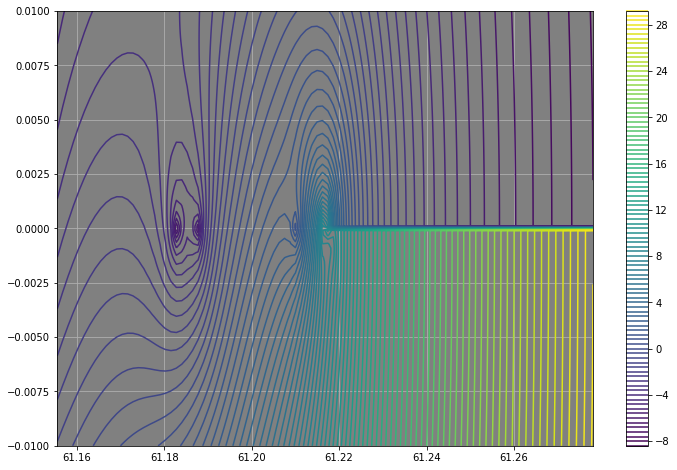

In [15]:
plotlogf(A.hybrid_det_matrix, .999*k_low, 1.001*k_low, -.01,.01, nu, outer,
         iref=100, rref=100, levels=100, loop=True)

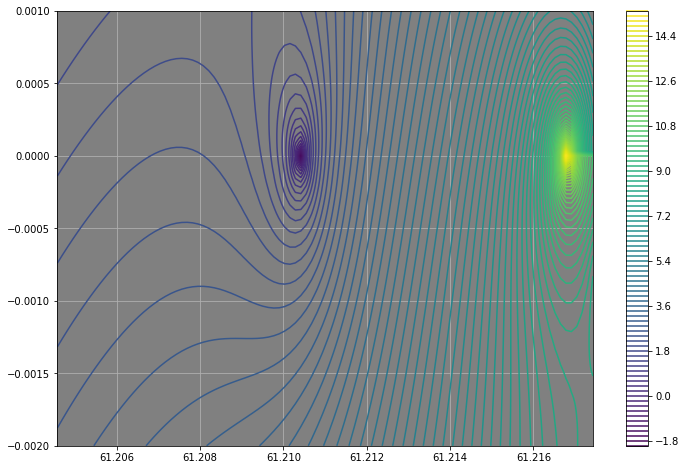

In [22]:
plotlogf(A.hybrid_det_matrix, .9998*k_low, 1.00001*k_low, -.002,.001, nu, outer,
         iref=100, rref=100, levels=100, loop=True)